# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  
<br>
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

* Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».;
* Нужно собрать данные по клиентам по следующим группам:
     * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
     * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
     * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
     * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

**Цели исследования**:

* Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
* В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
* Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Ход исследования**

Данные получены  из файлов `/datasets/market_file.csv`, `/datasets/market_money.csv`, `/datasets/money.csv` и `/datasets/market_time.csv`. О качестве данных ничего не известно. Поэтому перед анализом понадобится обзор данных.

Таким образом, исследование пройдёт в семь этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский Анализ Данных.
 4. Денормализация данных
 5. Корреляционный анализ данных
 6. Использование пайплайнов для построения лучшей модели.
 7. Анализ важности признаков.
 8. Сегментация покупателей
 9. Общий вывод

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd

market_file = pd.read_csv('/datasets/market_file.csv', sep = ',')
market_file.info()
market_file.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [2]:
market_money = pd.read_csv('/datasets/market_money.csv', sep = ',')
market_money.info()
market_money.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [3]:
market_time = pd.read_csv('/datasets/market_time.csv', sep = ',')
market_time.info()
market_time.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [4]:
money = pd.read_csv('/datasets/money.csv', sep = ';')
money.info()
money.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


##  Предобработка данных

In [5]:
market_file.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

In [6]:
market_file.duplicated().sum()

0

In [7]:
market_file['id'].duplicated().sum()

0

market_file - явных либо неявных дубликатов нет

In [8]:
print(market_file['Покупательская активность'].unique())
print(market_file['Тип сервиса'].unique())
print(market_file['Разрешить сообщать'].unique())
print(market_file['Популярная_категория'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [9]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].apply(lambda x : 'стандарт' if x == 'стандартт' else x)
print(market_file['Тип сервиса'].unique())

['премиум' 'стандарт']


market_file - аномальные значения в категориальных столбцах обработаны

In [10]:
market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

In [11]:
market_money.duplicated().sum()

0

In [12]:
market_money[['id', 'Период']].duplicated().sum()

0

market_money - явных либо неявных дубликатов нет

In [13]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [14]:
market_money['Период'] = market_money['Период'].apply(lambda x : 'предпредыдущий_месяц' if x == 'препредыдущий_месяц' else x)
print(market_money['Период'].unique())

['предпредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


market_money - аномальные значения в категориальных столбцах обработаны(ну глаза режет, ей Б-гу)

In [15]:
market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

In [16]:
market_time.duplicated().sum()

0

In [17]:
market_time[['id', 'Период']].duplicated().sum()

0

market_time - явных либо неявных дубликатов нет

In [18]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [19]:
market_time['Период'] = market_time['Период'].apply(lambda x : 'предыдущий_месяц' if x == 'предыдцщий_месяц' else x)
print(market_time['Период'].unique())

['текущий_месяц' 'предыдущий_месяц']


market_time - аномальные значения в категориальных столбцах обработаны

In [20]:
money.isna().sum()

id         0
Прибыль    0
dtype: int64

In [21]:
money.duplicated().sum()

0

In [22]:
money['Прибыль'] = money['Прибыль'].apply(lambda x: x.replace(',', '.')).astype('float')

In [23]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [24]:
market_file[market_file['id'].isin(money['id'].tolist())].shape[0]

1300

money - типы приведены

**Вывод:** 
Явные и неявные дубликаты и пропуски могут быть вызваны как случайностью, так и сайд-эффектами при экспорте данных из источника. При проектировании хранилищ данных(будь то БД или что-либо еще) должна быть валидация и, хотя бы, автоматическое разрешение конфликтов при добавлении/удалении/изменении/экспорте данных.

## Исследовательский анализ данных

In [25]:
import matplotlib.pyplot as plt
import numpy

def plotDistr(df, column, bins = 30):
    typeInfo = df.dtypes.to_dict()
    colType = typeInfo.get(column)
    
    if colType is None : 
        raise Exception("Wrong column name")
        
    if(colType == numpy.dtype('O')):
        ax = df.groupby(column).count()['id'].plot(kind = 'pie', autopct='%1.1f%%', title = f'distribution of {column}')
    else:
        ax = df[column].plot(kind = 'hist', bins = bins, title = f'distribution of {column}',figsize = (12, 5))
        ax.set_xlabel(column)
        ax.set_ylabel("count")
    fig2 = plt.figure()
    fig2.axes.append(ax)

    plt.show()
    
def decribe(df, column):
    df.boxplot(column = column, figsize = (9, 9))
    print(df[column].describe())
                                                   
def plotDistrAndDescribe(df, column, bins = 30):
    plotDistr(df, column, bins)
    decribe(df, column)

### market_file

In [26]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

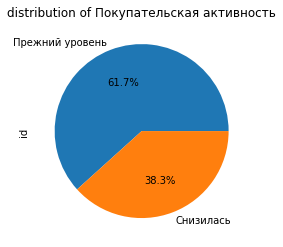

<Figure size 432x288 with 0 Axes>

In [27]:
plotDistr(market_file, 'Покупательская активность')

'Покупательская активность' - есть дисбаланс в таргете

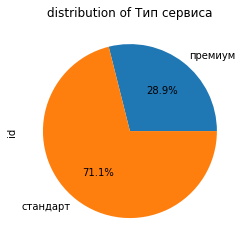

<Figure size 432x288 with 0 Axes>

In [28]:
plotDistr(market_file, 'Тип сервиса')

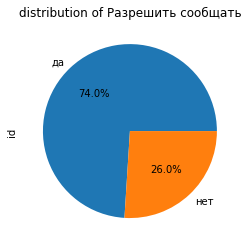

<Figure size 432x288 with 0 Axes>

In [29]:
plotDistr(market_file, 'Разрешить сообщать')

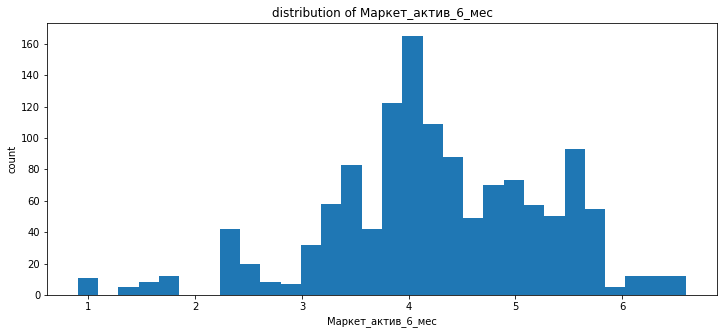

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


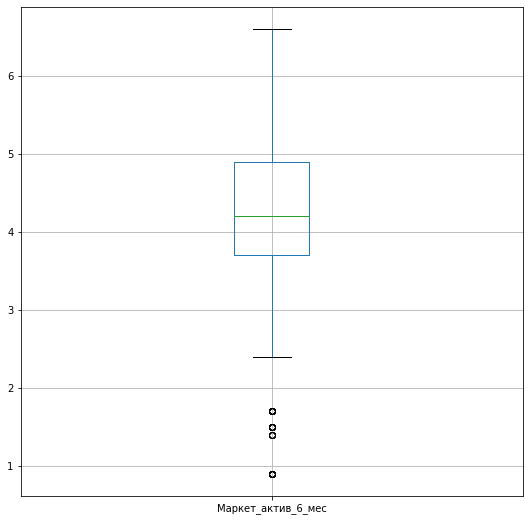

In [30]:
plotDistrAndDescribe(market_file, 'Маркет_актив_6_мес')

'Маркет_актив_6_мес' - на ящике видны выбросы, но это вполне допустимые значения, оставим

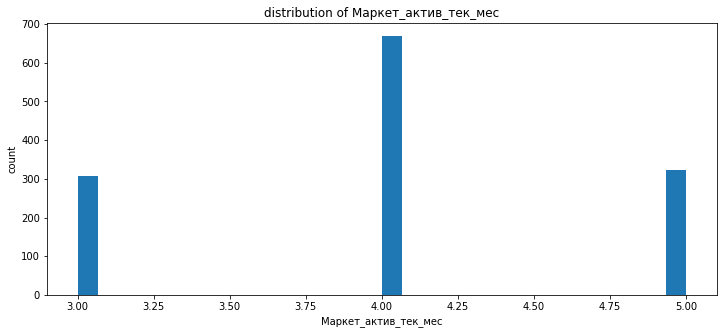

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64


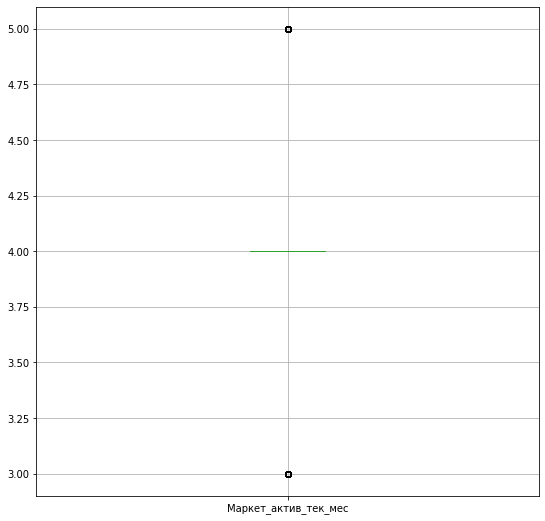

In [31]:
plotDistrAndDescribe(market_file, 'Маркет_актив_тек_мес')

'Маркет_актив_тек_мес' - явный кандидат на перевод в категориальный столбец

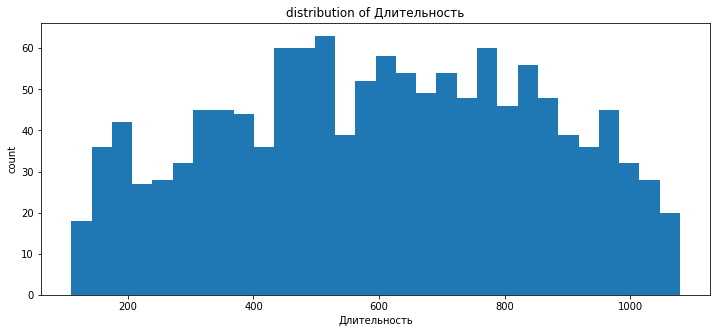

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64


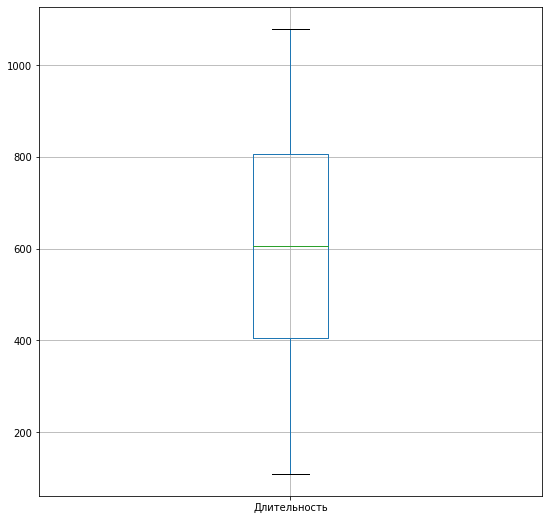

In [32]:
plotDistrAndDescribe(market_file, 'Длительность')

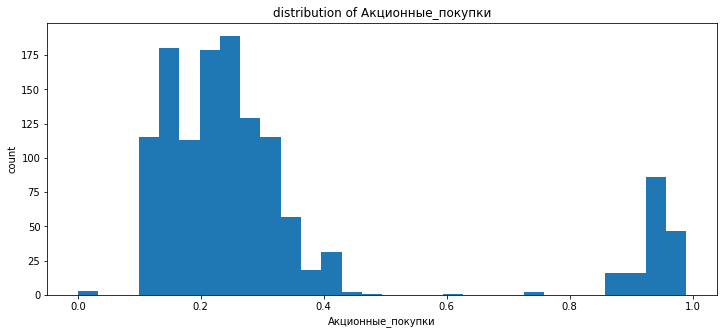

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64


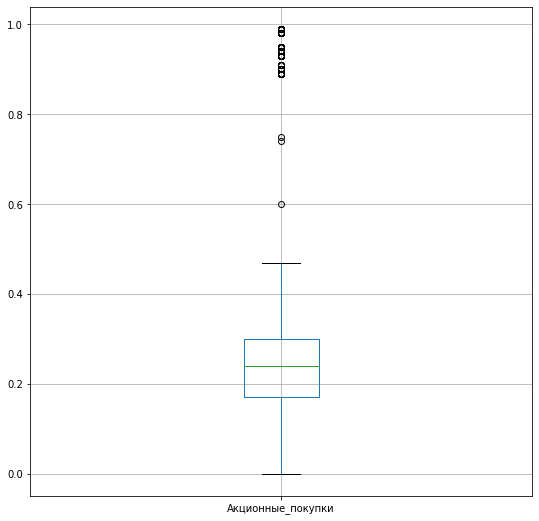

In [33]:
plotDistrAndDescribe(market_file, 'Акционные_покупки')

'Акционные_покупки' - на ящике видны выбросы, но это вполне допустимые значения, оставим(ну мало ли, есть же люди, которые чисто по акции затариваются)

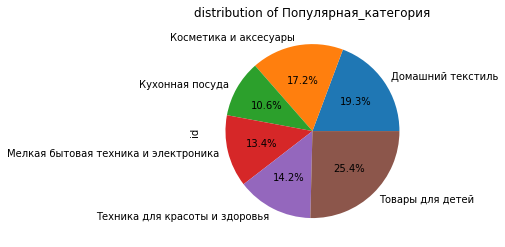

<Figure size 432x288 with 0 Axes>

In [34]:
plotDistr(market_file, 'Популярная_категория')

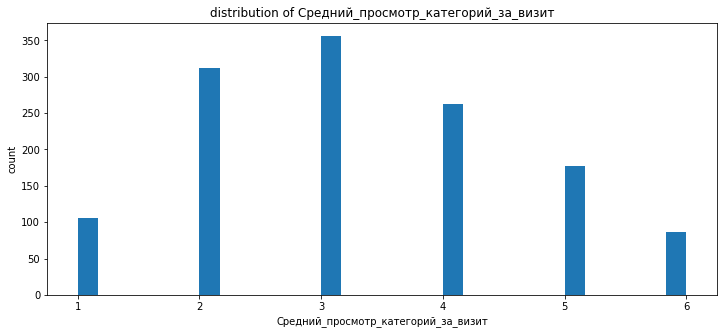

<Figure size 432x288 with 0 Axes>

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


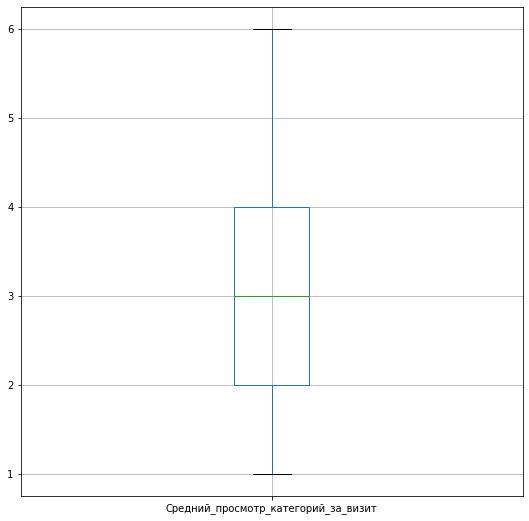

In [35]:
plotDistrAndDescribe(market_file, 'Средний_просмотр_категорий_за_визит')

'Средний_просмотр_категорий_за_визит' - кандидат на перевод в категориальный столбец

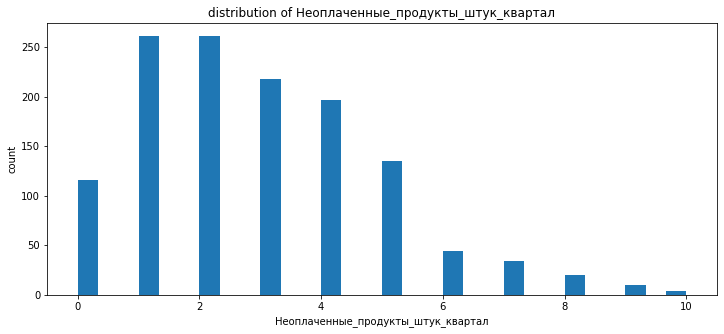

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


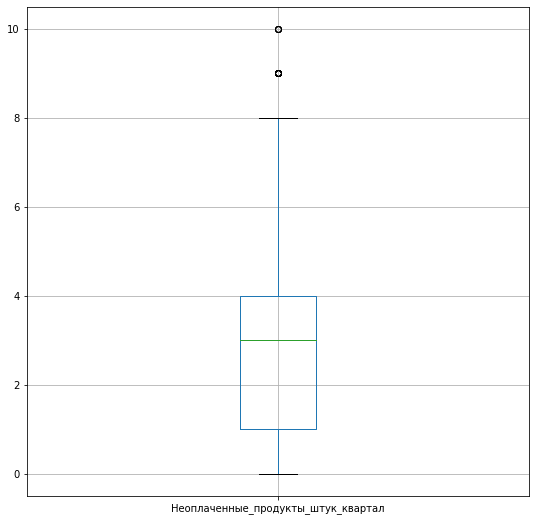

In [36]:
plotDistrAndDescribe(market_file, 'Неоплаченные_продукты_штук_квартал')

'Неоплаченные_продукты_штук_квартал' - на ящике видны выбросы, но это вполне допустимые значения, оставим

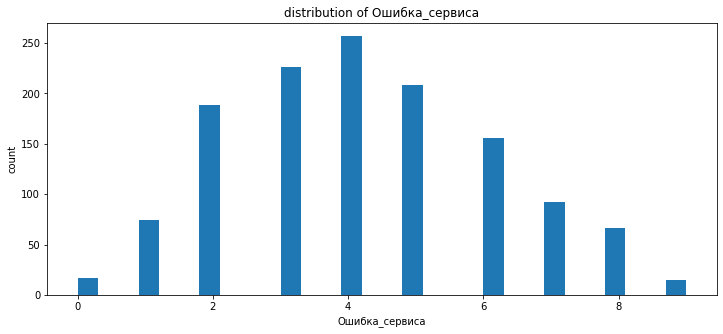

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64


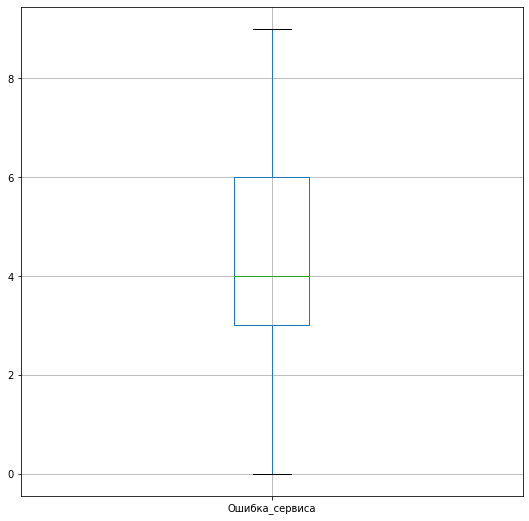

In [37]:
plotDistrAndDescribe(market_file, 'Ошибка_сервиса')

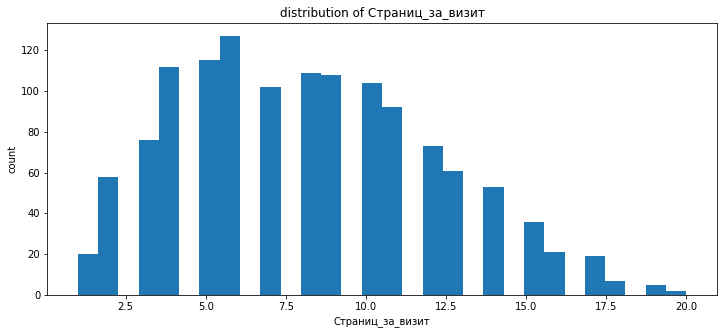

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


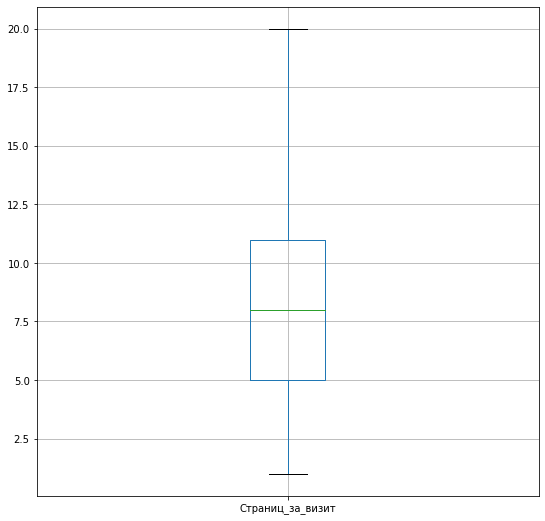

In [38]:
plotDistrAndDescribe(market_file, 'Страниц_за_визит')

### market_money

In [39]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


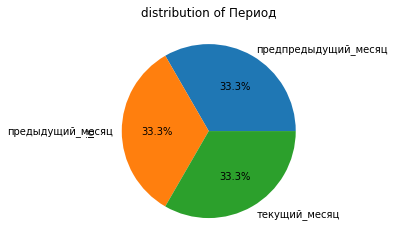

<Figure size 432x288 with 0 Axes>

In [40]:
plotDistr(market_money, 'Период')

'Период' - прикольно, паритет

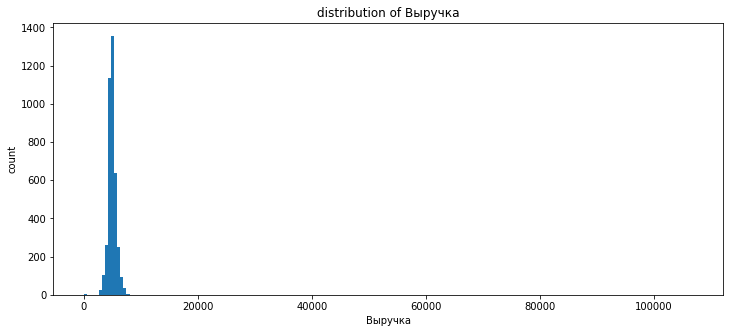

<Figure size 432x288 with 0 Axes>

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64


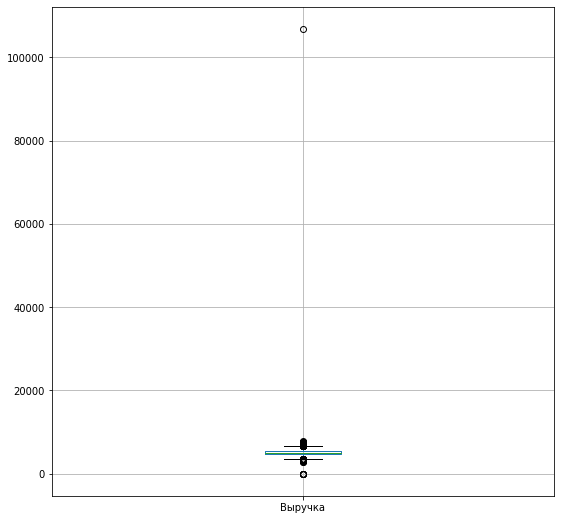

In [41]:
plotDistrAndDescribe(market_money, 'Выручка', bins = 200)

Сотня и 0 - выбросы, удалим

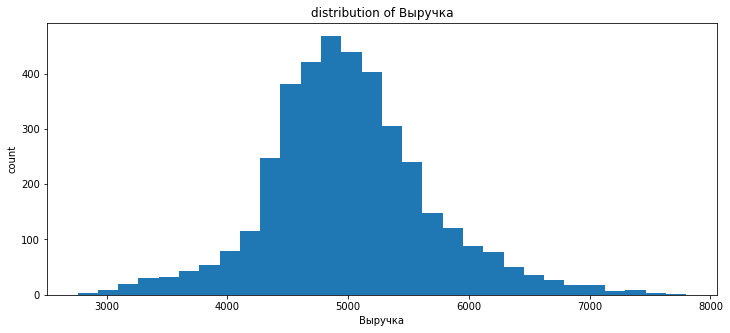

<Figure size 432x288 with 0 Axes>

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64


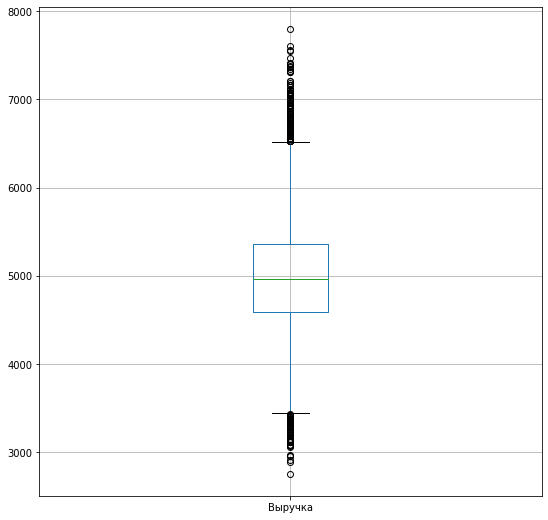

In [42]:
market_money = market_money[(market_money['Выручка'] < 20000) & (market_money['Выручка'] > 0)]
plotDistrAndDescribe(market_money, 'Выручка')

теперь лучше

### market_time

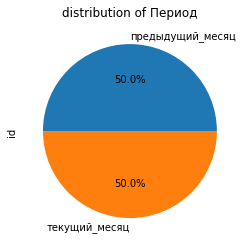

<Figure size 432x288 with 0 Axes>

In [43]:
plotDistr(market_time, 'Период')

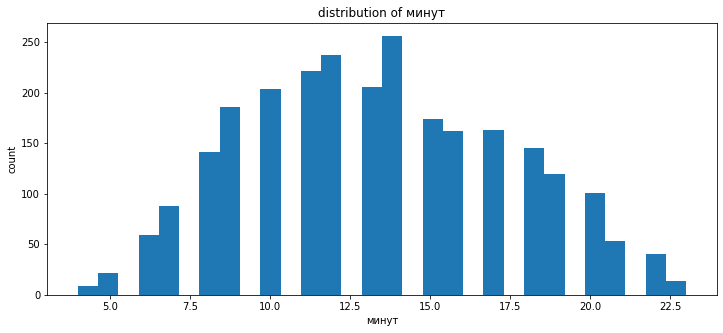

<Figure size 432x288 with 0 Axes>

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


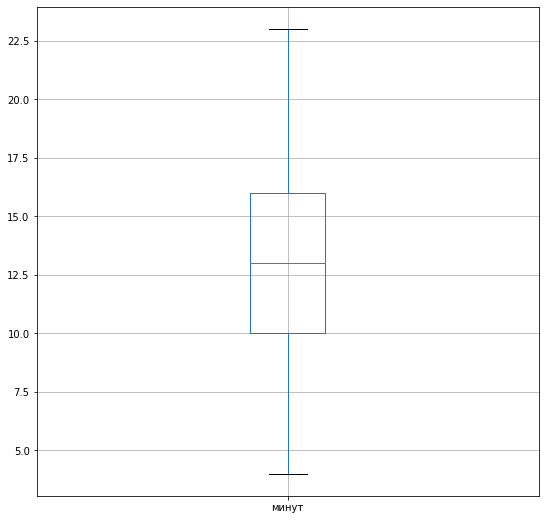

In [44]:
plotDistrAndDescribe(market_time, 'минут')

### money

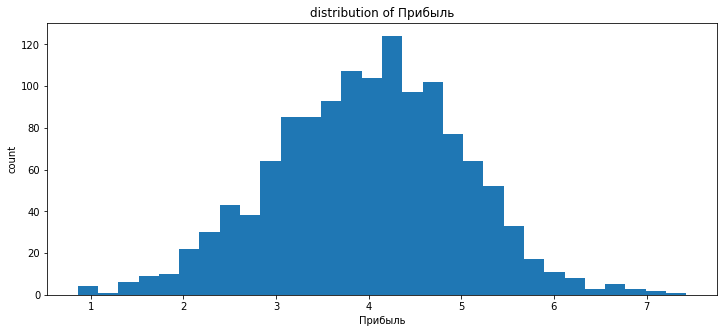

<Figure size 432x288 with 0 Axes>

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


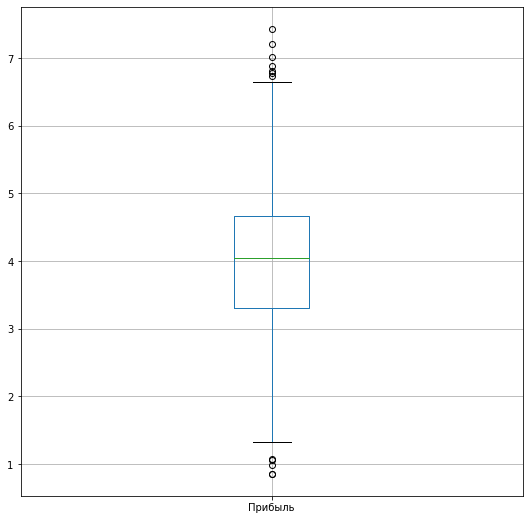

In [45]:
plotDistrAndDescribe(money, 'Прибыль')

 на ящике видны выбросы, но это вполне допустимые значения, оставим

### Отбор клиентов с покупательской активностью не менее 3 месяца

In [46]:
table = market_money.pivot_table(index = 'Период', values = 'id', aggfunc=lambda x: set(x))
table['id'][0]
ids = set()
for id in market_money['id']:
    if (id in table['id'][0]) & (id in table['id'][1]) & (id in table['id'][2]):
        ids.add(id)

len(ids)

1296

In [47]:
market_file = market_file[market_file['id'].isin(ids)]
market_file.shape[0]

1296

In [48]:
market_money = market_money[market_money['id'].isin(ids)]
market_money.shape[0]

3888

In [49]:
market_time = market_time[market_time['id'].isin(ids)]
market_time.shape[0]

2592

In [50]:
money = money[money['id'].isin(ids)]
money.shape[0]

1296

### Вывод

Вывод: На данном этапе был проведен исследовательский анализ данных. Было выявлено небольшое количество аномальных значений, которые были исключены.
Были отобраны клиенты с покупательской активностью не менее 3 месяца

## Объединение таблиц

In [51]:
def left_merge_df_flatten(left, right, group_col):
    
    for name, group in right.groupby(group_col):
        columns = group.columns.tolist()
        columns[2] = f'{columns[2]}_{name}'# прибью двойку гвоздями, лень полностью абстрактный алгоритм пилить
        group.columns = columns
        columns.remove(group_col)
        left = left.merge(group[columns], on='id', how = 'left')
        
    return left
    
market_full = market_file.copy(deep = True)
market_full = left_merge_df_flatten(market_full, market_money, 'Период')
market_full = left_merge_df_flatten(market_full, market_time, 'Период')
market_full.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [52]:
market_full.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
Выручка_предпредыдущий_месяц           0
Выручка_предыдущий_месяц               0
Выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

Вывод: данные были денормализованы, поскольку модели затруднительно скормить нормализованные данные, и объединены.

## Корреляционный анализ

<AxesSubplot:>

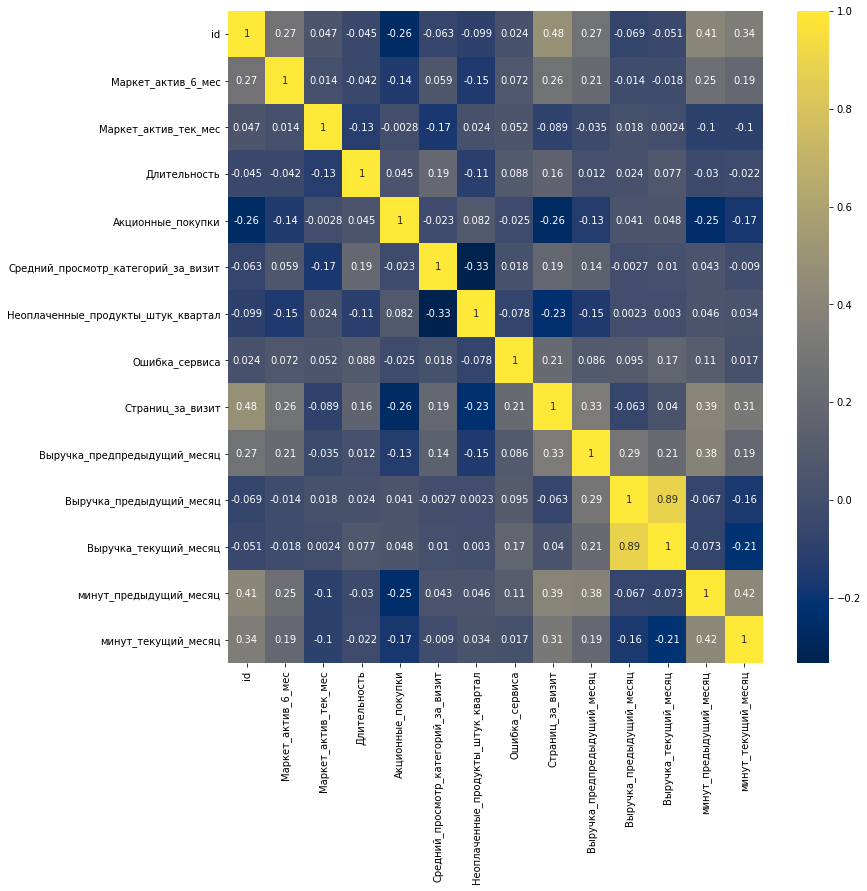

In [53]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(market_full[market_full['Покупательская активность'] == 'Снизилась'].corr(method = 'spearman'), annot=True, cmap='cividis')

<AxesSubplot:>

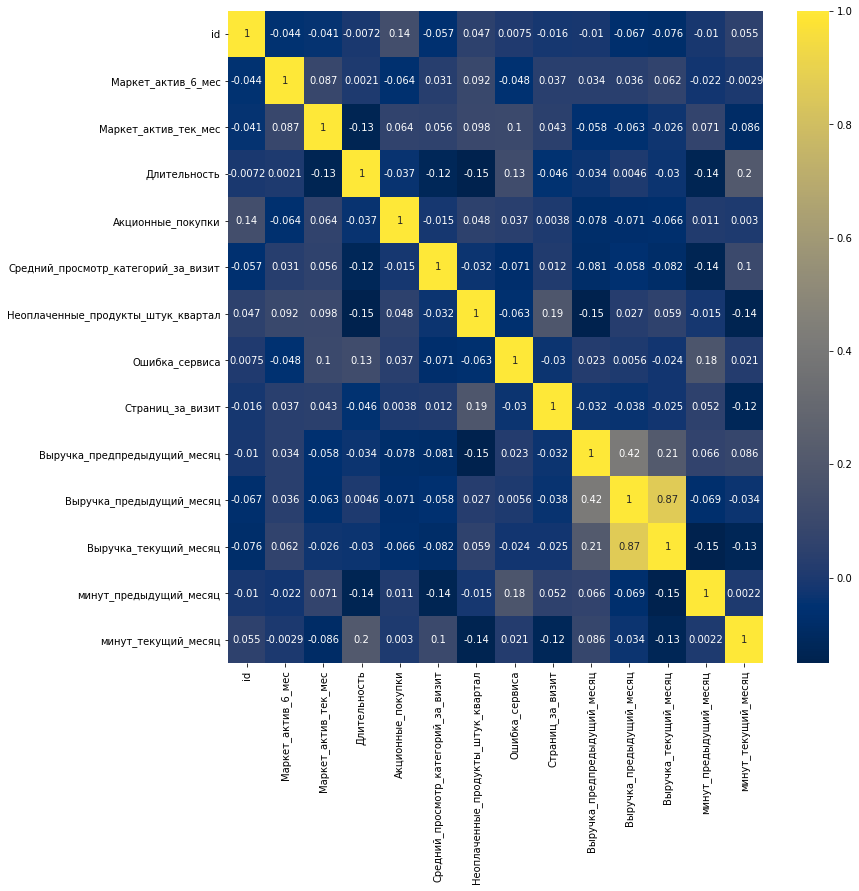

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(market_full[market_full['Покупательская активность'] == 'Прежний уровень'].corr(method = 'spearman'), annot=True, cmap='cividis')

Вывод: Взял корреляцию Спирмана, поскольку величины не распределны нормально. Сильной корреляции не наблюдается ни у одной пары признаков. Мультиколлинеарность остутствует. В зависимости от значения есть небольшие расхождения у соответствующий пар признаков, но они все, кроме 'выручка_текущий_месяц' и 'выручка_предыдущий_месяц', находятся в категории слабой или умеренной корреляции. Выручка_текущий_месяц и выручка_предыдущий_месяц имеют высокую степень коррелции, но степень недостаточна для мультиколлинеарности

## Использование пайплайнов

In [55]:
!pip install scikit-learn==1.1.3
!pip install shap -q

Вот это могли бы и девопсы сделать. Ну серьезно, пинструментарий для проекта так то регламентирован(дефолтный по крайней мере) должен быть, ну подняли бы виртуалку на каждого студента из образа, е-мое.

Нужно привести количественные признаки 'Маркет_актив_тек_мес' и 'Средний_просмотр_категорий_за_визит' к категориальным

In [56]:
market_full['Маркет_актив_тек_мес'] = market_full['Маркет_актив_тек_мес'].apply(lambda x: 'Низкая' if x < 4 else 'Средняя' if x < 5 else 'Высокая' )
market_full['Средний_просмотр_категорий_за_визит'] = market_full['Средний_просмотр_категорий_за_визит'].apply(lambda x: 'Низкий' if x < 3 else 'Средний' if x < 5 else 'Высокий' )
market_full.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,Средняя,819,0.75,Товары для детей,Средний,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,Низкая,539,0.14,Домашний текстиль,Высокий,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,Высокая,896,0.99,Товары для детей,Высокий,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,Низкая,1064,0.94,Товары для детей,Средний,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,Средняя,762,0.26,Домашний текстиль,Средний,1,1,4,5124.0,4738.5,5388.5,10,10


In [57]:
market_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   object 
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   object 
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [58]:
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    market_full.drop(['Покупательская активность', 'id'], axis=1),
    market_full['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_full['Покупательская активность'])



# создаём списки с названиями признаков
ohe_columns = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Маркет_актив_тек_мес', 'Средний_просмотр_категорий_за_визит']
num_columns = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))])

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['Низкая', 'Средняя', 'Высокая'], 
                    ['Низкий', 'Средний', 'Высокий'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier()],
        'models__max_depth': range(3, 10),
        'models__max_features': range(2, 6),
        #'models__min_samples_split' : range(2, 6),
        #'models__min_samples_leaf' : range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], 
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()], 
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

probabilities = randomized_search.predict_proba(X_test)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc_score(y_test, probabilities_one)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Популярная_категория']),
                               

Вывод: лучшая модель -  LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear') (И слава Б-гу! Shap на остальном до второго пришествия даже на моих 20 ядрах считался, хотя я не уверен, что он параллелится)

## Анализ важности признаков

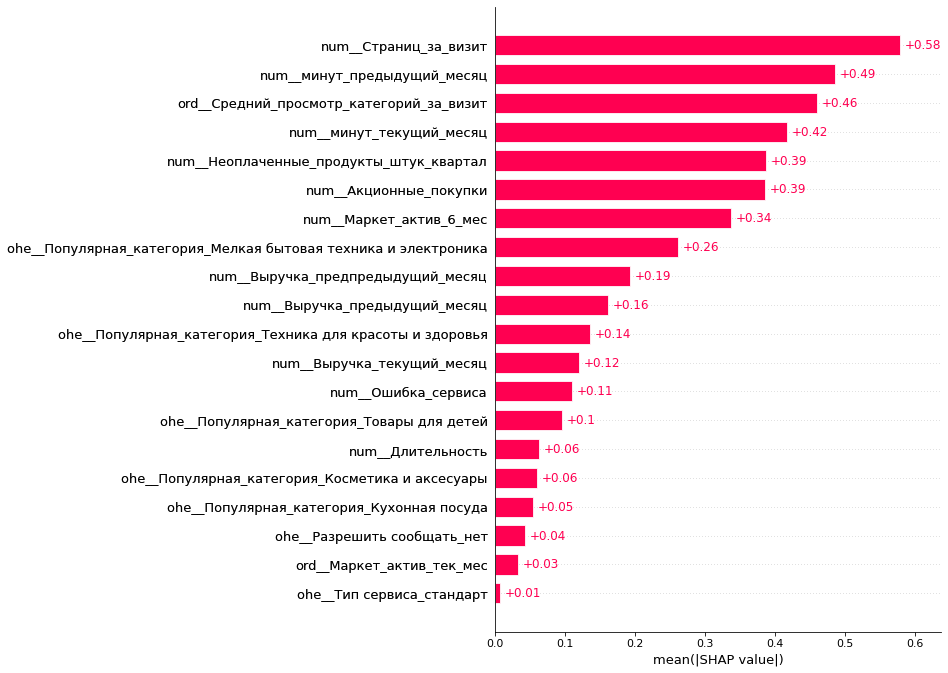

None

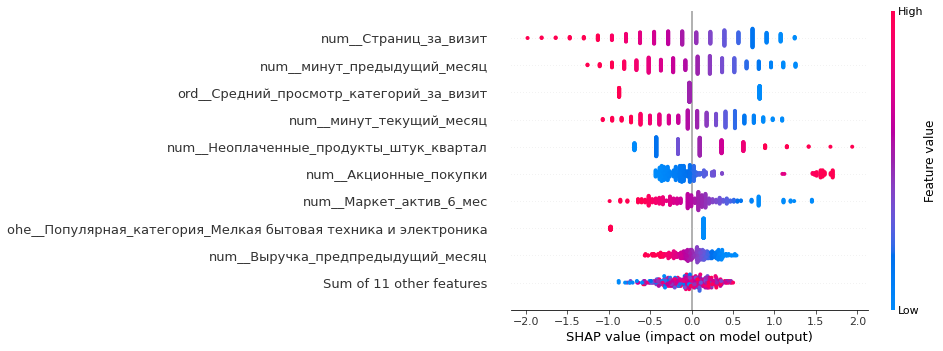

In [59]:
import shap

X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)


explainer = shap.Explainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
 
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
 
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=50))
shap.plots.beeswarm(shap_values)

#shap.plots.waterfall(shap_values[13])

Вывод: наиболее значимые признаки - 'Страниц_за_визит', 'минут_текущий_месяц', 'Средний_просмотр_категорий_за_визит', 'минут_текущий_месяц', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Маркет_актив_6_мес'. Прикольно, что 'Тип сервиса' вообще ни на что не влияет, хорошо хоть маркетологам не зря платят. С точки зрения бизнеса логично было бы стараться увеличить время присутствия покупателя на сайте, следовательно нужно увеличивать количество наименований и категорий товаров, а также затраты на маркетинг

## Сегментация покупателей

In [60]:
market_full_seg = market_full.merge(money, on='id', how = 'left').drop('id', axis = 1)
market_full_seg.head(5)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,Прибыль
0,Снизилась,премиум,да,4.4,Средняя,819,0.75,Товары для детей,Средний,4,2,5,4472.0,5216.0,4971.6,12,10,4.16
1,Снизилась,стандарт,нет,4.9,Низкая,539,0.14,Домашний текстиль,Высокий,2,1,5,4826.0,5457.5,5058.4,8,13,3.13
2,Снизилась,стандарт,да,3.2,Высокая,896,0.99,Товары для детей,Высокий,0,6,4,4793.0,6158.0,6610.4,11,13,4.87
3,Снизилась,стандарт,нет,5.1,Низкая,1064,0.94,Товары для детей,Средний,2,3,2,4594.0,5807.5,5872.5,8,11,4.21
4,Снизилась,стандарт,да,3.3,Средняя,762,0.26,Домашний текстиль,Средний,1,1,4,5124.0,4738.5,5388.5,10,10,3.95


In [62]:
x = market_full.drop(['Покупательская активность'], axis = 1)


market_full_seg['Покупательская активность_снизилась_propability'] = randomized_search.predict_proba(x)[:,1]
market_full_seg.head(5)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предпредыдущий_месяц,Выручка_предыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,Прибыль,Покупательская активность_снизилась_propability
0,Снизилась,премиум,да,4.4,Средняя,819,0.75,Товары для детей,Средний,4,2,5,4472.0,5216.0,4971.6,12,10,4.16,0.915754
1,Снизилась,стандарт,нет,4.9,Низкая,539,0.14,Домашний текстиль,Высокий,2,1,5,4826.0,5457.5,5058.4,8,13,3.13,0.363415
2,Снизилась,стандарт,да,3.2,Высокая,896,0.99,Товары для детей,Высокий,0,6,4,4793.0,6158.0,6610.4,11,13,4.87,0.754746
3,Снизилась,стандарт,нет,5.1,Низкая,1064,0.94,Товары для детей,Средний,2,3,2,4594.0,5807.5,5872.5,8,11,4.21,0.940934
4,Снизилась,стандарт,да,3.3,Средняя,762,0.26,Домашний текстиль,Средний,1,1,4,5124.0,4738.5,5388.5,10,10,3.95,0.725487


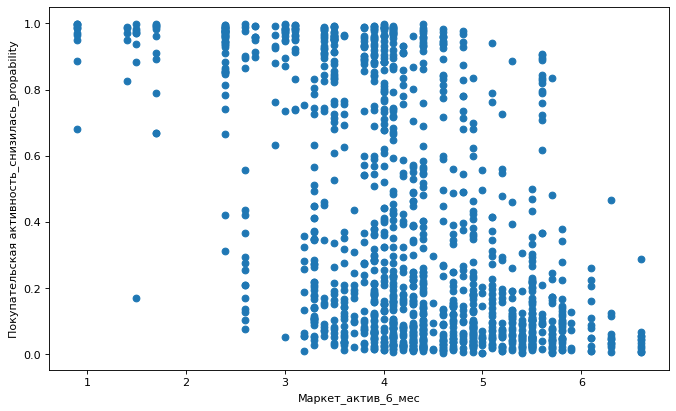

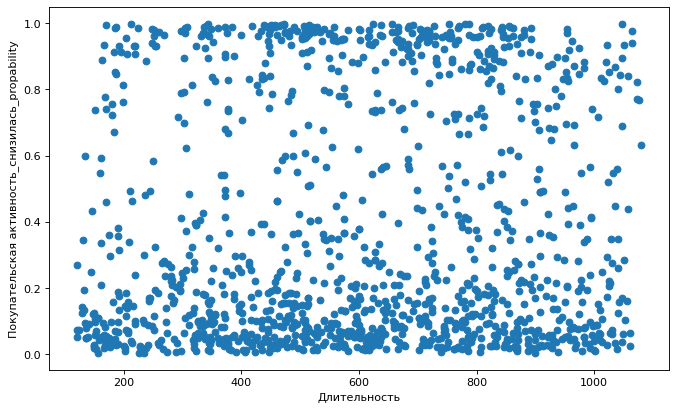

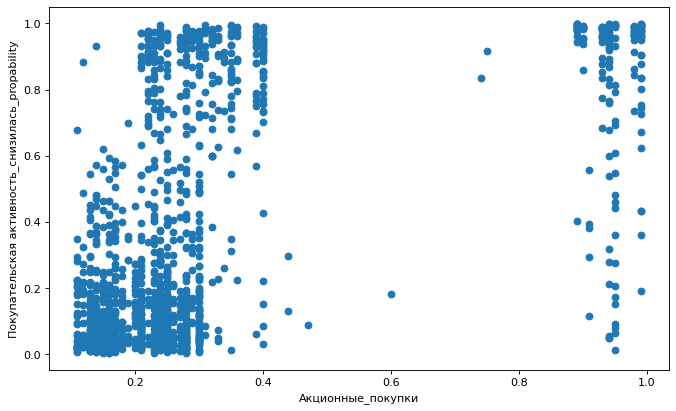

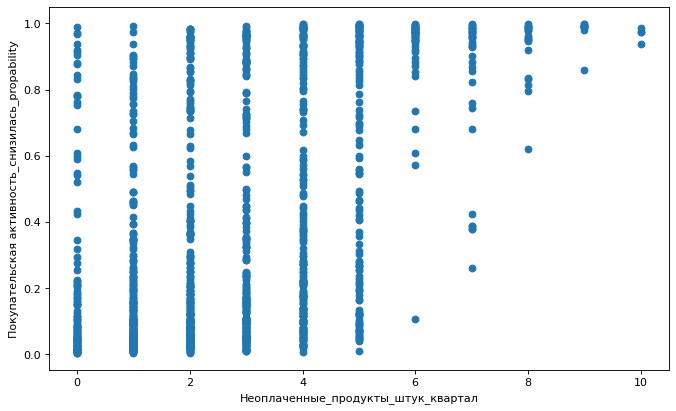

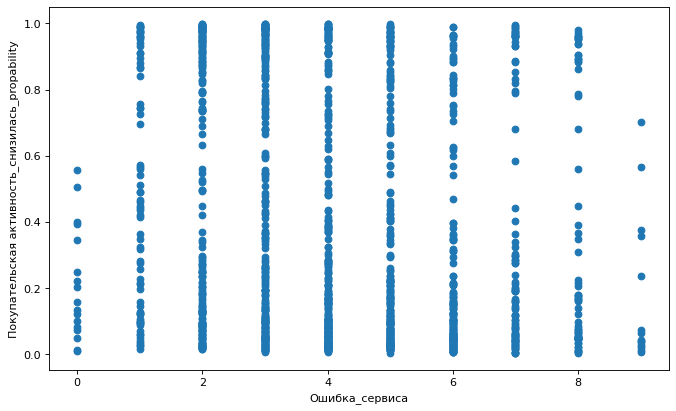

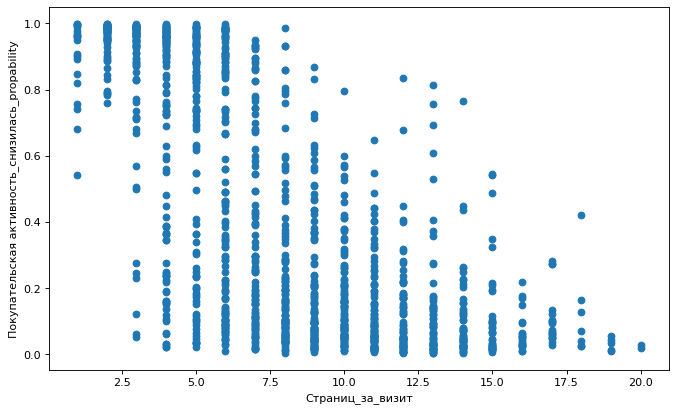

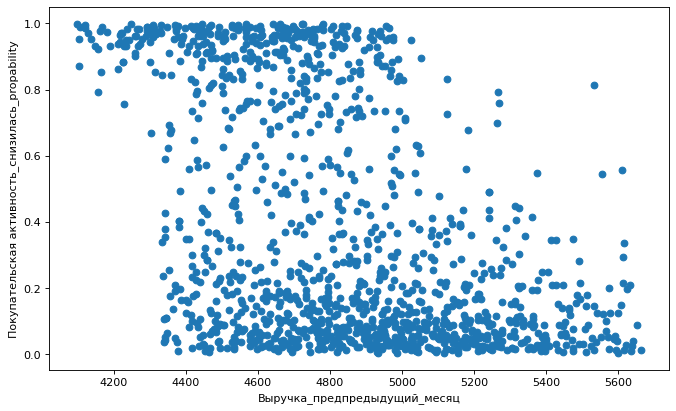

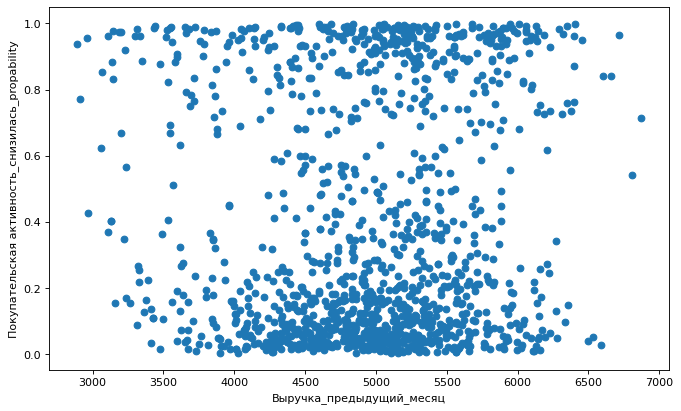

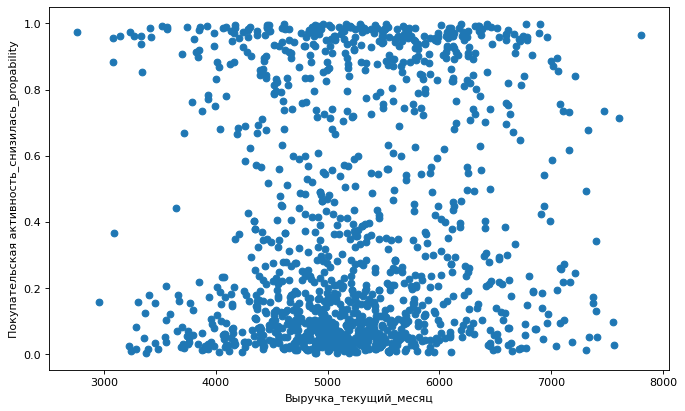

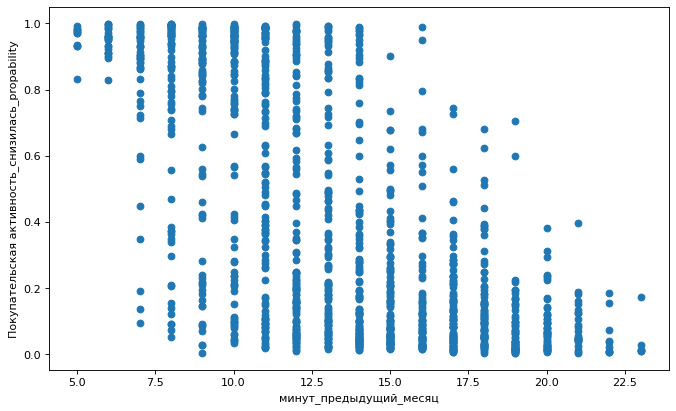

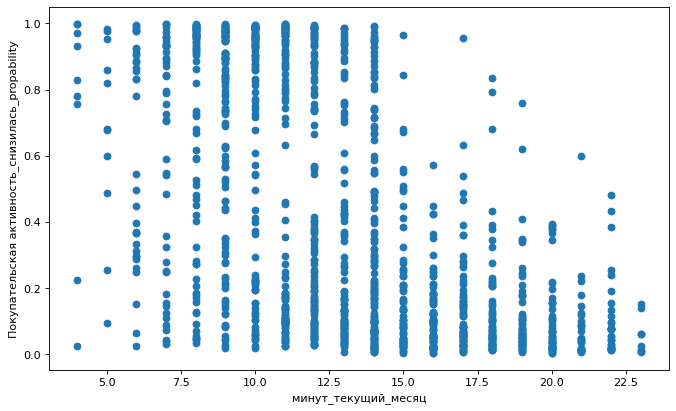

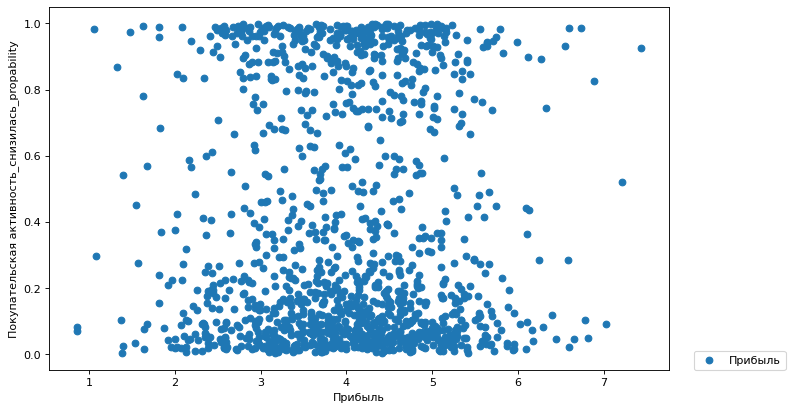

In [69]:
def plot(data, x_column):
    for column in data.drop(x_column, axis = 1).columns:
        if data[column].dtype != 'object':
            plt.title = 'fuck'
            plt.figure(figsize=(10, 6), dpi=80)
            plt.scatter(data[column], data[x_column], label = column)
            plt.xlabel(column)
            plt.ylabel(x_column)
    plt.figsize = (20,20)
    plt.legend(loc=(1.04, 0))
    plt.show()
    
plot(market_full_seg, 'Покупательская активность_снизилась_propability')

In [77]:
segment = market_full_seg[(market_full_seg['Покупательская активность_снизилась_propability'] > 0.6) &
                         market_full_seg['Акционные_покупки'] > 0.8]

other_customers = market_full_seg[(market_full_seg['Покупательская активность_снизилась_propability'] < 0.6)]


902

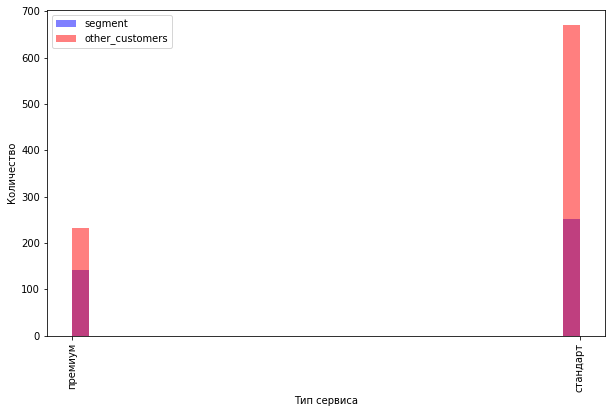

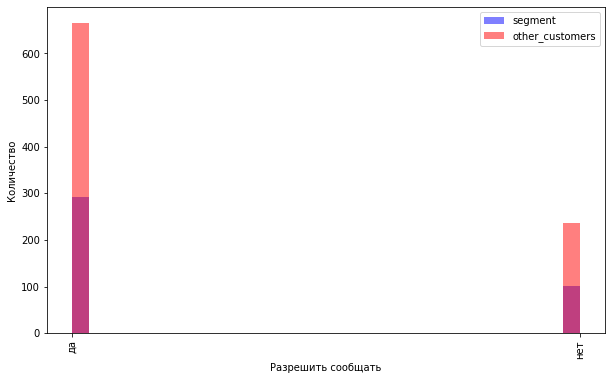

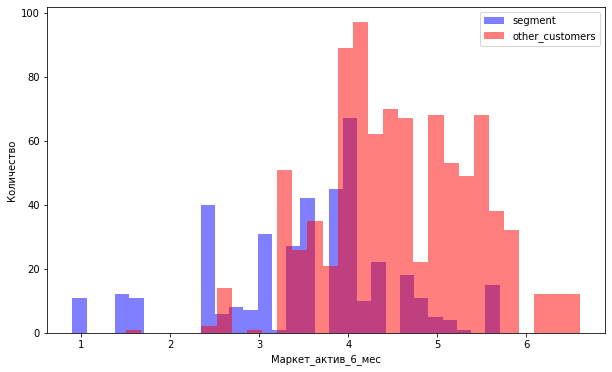

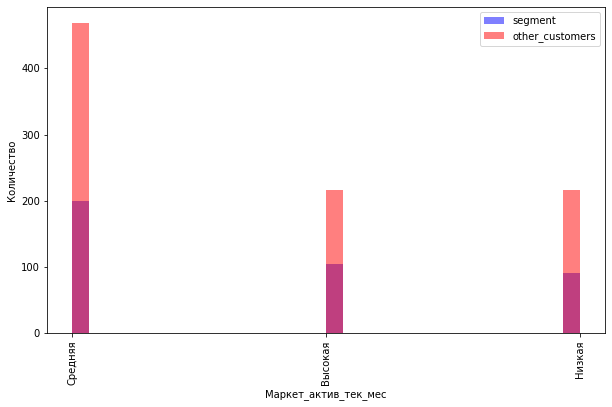

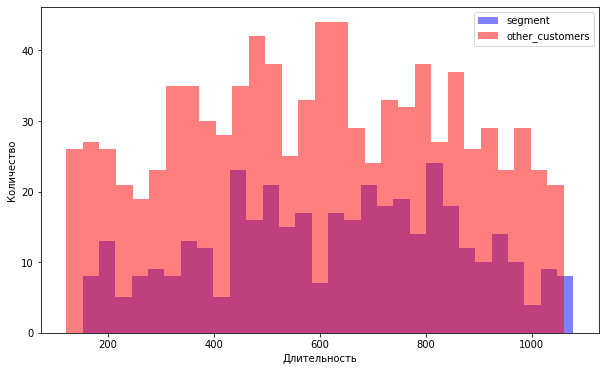

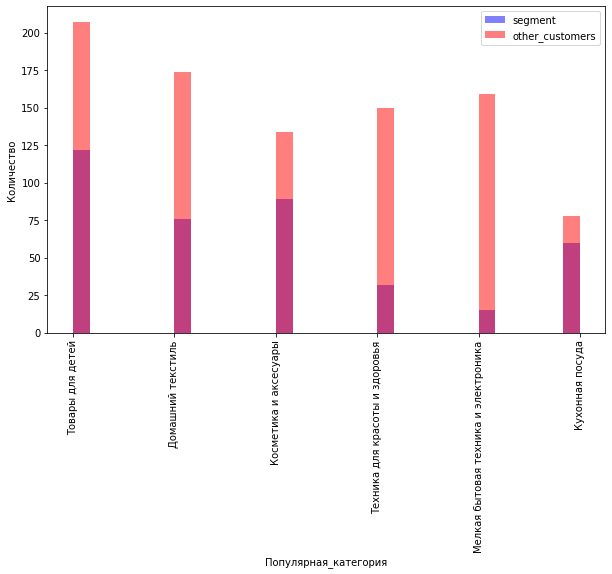

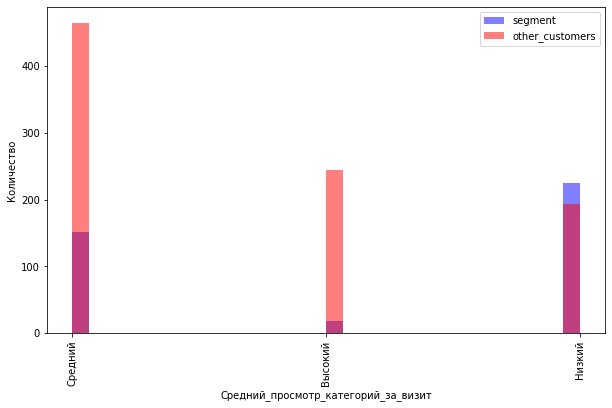

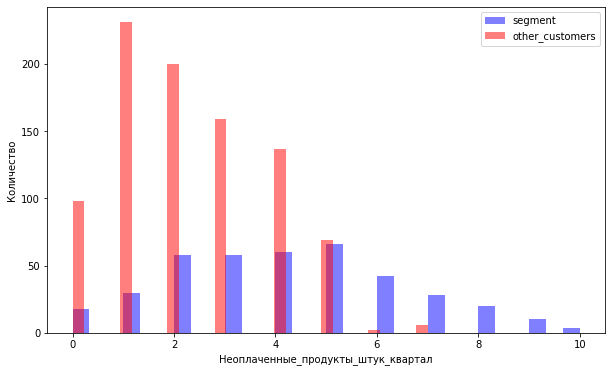

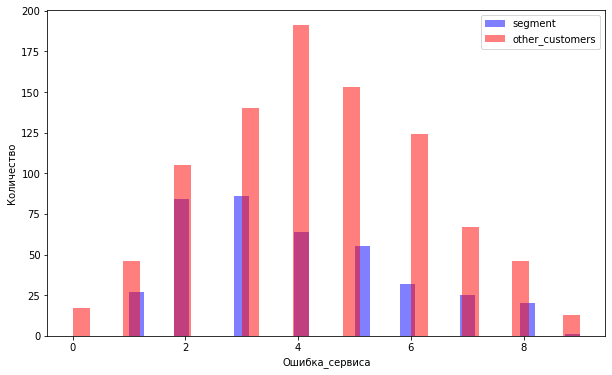

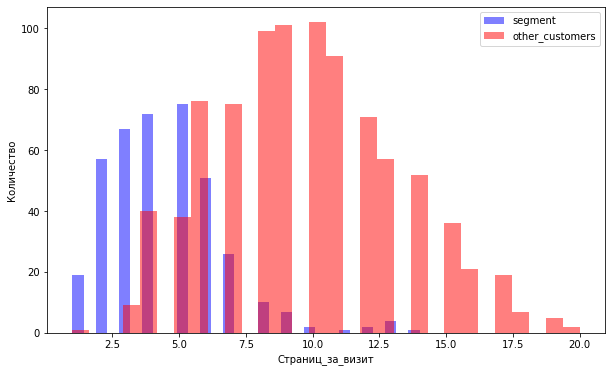

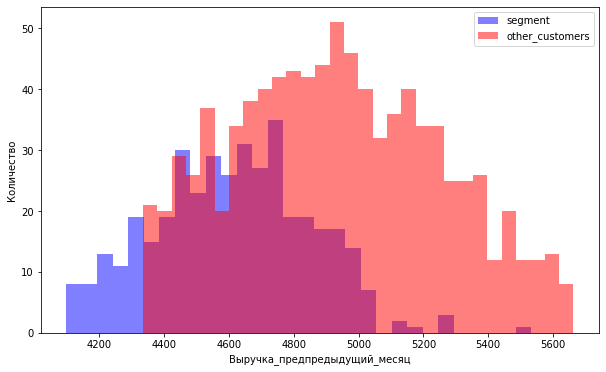

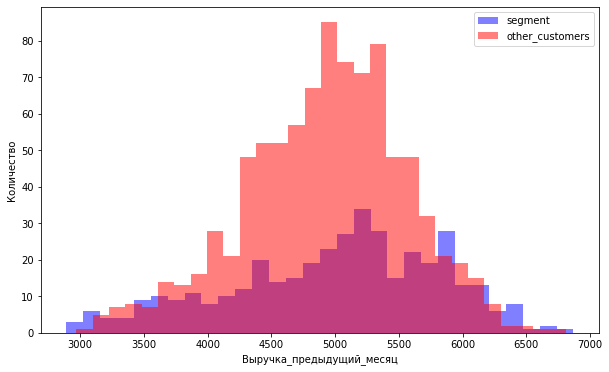

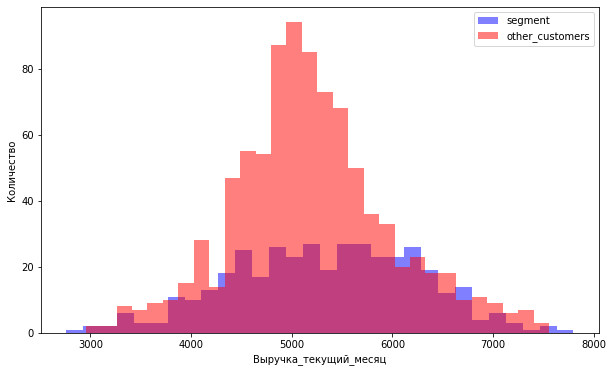

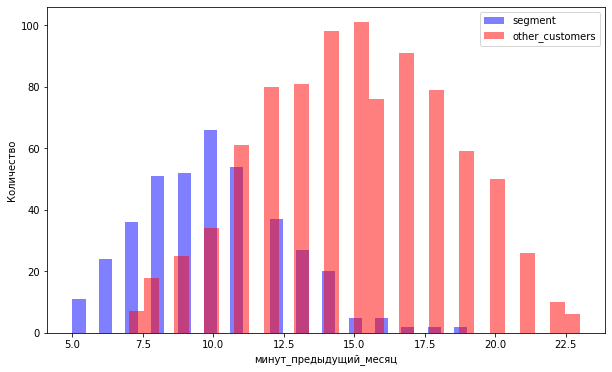

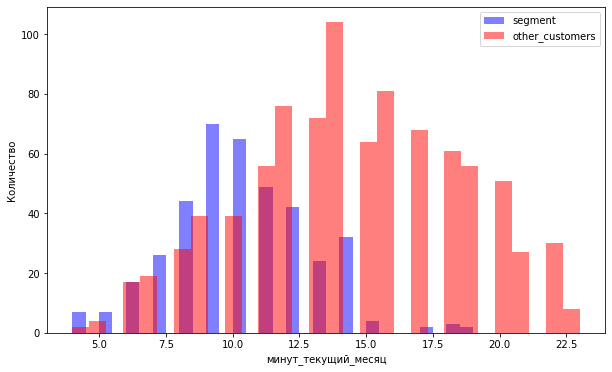

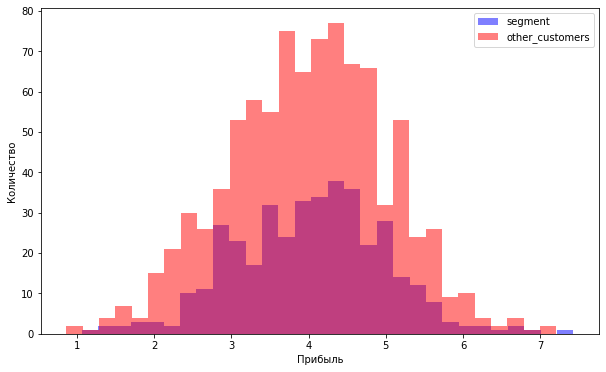

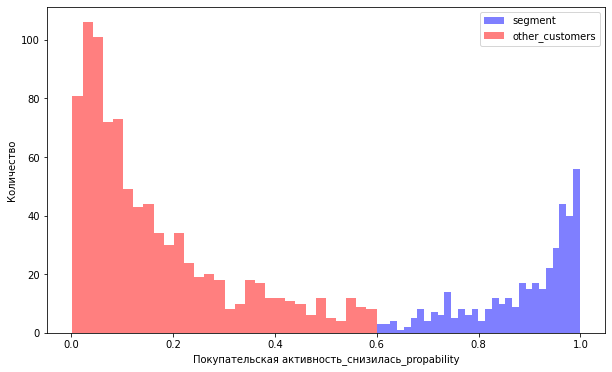

In [79]:
segment = market_full_seg[(market_full_seg['Покупательская активность_снизилась_propability'] > 0.6) &
                         market_full_seg['Акционные_покупки'] > 0.8]

other_customers = market_full_seg[(market_full_seg['Покупательская активность_снизилась_propability'] < 0.6)]

columns = other_customers.columns.tolist()
columns.remove('Покупательская активность')
columns.remove('Акционные_покупки')


for column in columns:
    plt.figure(figsize=(10, 6))
    
    plt.hist(segment[column], bins=30, alpha=0.5, color='b', label='segment')
    
    plt.hist(other_customers[column], bins=30, alpha=0.5, color='r', label='other_customers')
    
    
    #plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.legend()
    
    if market_full_seg[column].dtype == 'object':
        plt.xticks(rotation='vertical')
    
    plt.show()

In [80]:
segment['Общая_выручка_3_месяца'] = segment[['Выручка_предпредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц']].sum(axis=1)
other_customers['Общая_выручка_3_месяца'] = other_customers[['Выручка_предпредыдущий_месяц', 'Выручка_предыдущий_месяц', 'Выручка_текущий_месяц']].sum(axis=1)

segment['Общие_минуты_2_месяца'] = segment[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)
other_customers['Общие_минуты_2_месяца'] = other_customers[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)

columns += ['Общая_выручка_3_месяца', 'Общие_минуты_2_месяца']

table = pd.DataFrame()


for column in columns:
    if segment[column].dtype == 'object':
        table.loc['mode segment', column] = segment[column].mode()[0]
        table.loc['mode other_customers', column] = other_customers[column].mode()[0]
    else:
        table.loc['median segment', column] = segment[column].median()
        table.loc['median other_customers', column] = other_customers[column].median()


display(table.transpose())


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,mode segment,mode other_customers,median segment,median other_customers
Тип сервиса,стандарт,стандарт,NaN,NaN
Разрешить сообщать,да,да,NaN,NaN
Маркет_актив_6_мес,NaN,NaN,3.8,4.4
Маркет_актив_тек_мес,Средняя,Средняя,NaN,NaN
Длительность,NaN,NaN,651.0,595.0
Популярная_категория,Товары для детей,Товары для детей,NaN,NaN
Средний_просмотр_категорий_за_визит,Низкий,Средний,NaN,NaN
Неоплаченные_продукты_штук_квартал,NaN,NaN,4.0,2.0
Ошибка_сервиса,NaN,NaN,3.5,4.0
Страниц_за_визит,NaN,NaN,4.0,10.0


можно сделать следующие выводы:


- **Длительность**: Средняя длительность посещения сайта примерно одинакова для обеих групп покупателей (590 минут и 627 минут у остальных покупателей).
- **Неоплаченные продукты**: покупатели из сегмента в среднем оставляют больше неоплаченных товаров (4.0 против 2.0 у остальных соответственно).
- **Общая выручка за 3 месяца**: Общая выручка за последние три месяца примерно одинакова для обеих групп покупателей (15145.7  против 15107.75).
- **Общее время на сайте за 2 месяца**: Остальные покупатели в среднем проводят на сайте больше времени (30.0 минут против 20.0 минут у покупателей из сегмента).
- **Популярная категория**: Для обеих групп покупателей самой популярной категорией являются товары для детей.
- **Прибыль**: Средняя прибыль от остальных покупателей немного выше, чем от покупателей из сегмента (4.04 против 4.01).
- **Разрешение на рассылку**: Большинство покупателей из обеих групп разрешили рассылку.
- **Средний просмотр категорий за визит**: Остальные покупатели в среднем просматривают больше категорий за визит
- **Страниц за визит**: Остальные покупатели в среднем просматривают больше страниц за визит (10.0 против 4.0)

Предложения по работе с сегментом для увеличения покупательской активности:

1. **Увеличение количества акций**: Поскольку этот сегмент покупателей часто совершает акционные покупки, можно увеличить количество акций и скидок, чтобы стимулировать их активность.

2. **Оптимизация времени на сайте**: Учитывая, что эти покупатели проводят меньше времени на сайте, можно оптимизировать пользовательский интерфейс и добавить акционные фильтры.

3. **Улучшение системы рекомендаций**: Поскольку эти покупатели часто просматривают меньше категорий за визит, можно улучшить систему рекомендаций, чтобы предлагать им товары, которые могут их заинтересовать.

4. **Работа с неоплаченными продуктами**: Учитывая, что эти покупатели часто оставляют неоплаченные продукты, можно предложить им специальные скидки или напоминания о них.

5. **Сообщения и уведомления**: Поскольку большинство покупателей из этого сегмента разрешили рассылку, можно использовать этот канал для отправки персонализированных предложений и напоминаний о неоплаченных продуктах.

Эти стратегии могут помочь увеличить покупательскую активность среди сегмента покупателей.

##  Общий вывод

Задачей данного иссследования было обучить модель, которая предсказывает снижение покупательской активности клиентов провести сегментирование клиентов и предложить стратегию для увеличения покупательской активности.

В рамках исследования были проделаны следующие шаги.


### Предобработка данных 

В датасете нет пропусков, имеются явные дубликаты и неявные в категориальных столбцах. Семантические дубликаты категориальных данных приведены к единообразию. Данные приведены к соответствующим типам

### Исследовательский анализ данных

Построены графики по всем признакам всех датафреймов, которые помогли нам найти выбросы в количественных признаках. Для количественных признаковы использоватилсь два типа графиков: гистограмма и ящик с усами. Для категорильных: круговая диаграмма.
    
### Корреляционный анализ данных

На этом этапе был проведен анализ взаимосвязи признаков между собой. Такая взаимосвязь поможет в дальнейшем, при построении моделей.  
Были построены иатрицы корреляции с группировкой по таргету для выявления мультиколлинеарности признаков.

Сильной корреляции не наблюдается ни у одной пары признаков. Мультиколлинеарность остутствует. В зависимости от значения есть небольшие расхождения у соответствующий пар признаков, но они все, кроме 'выручка_текущий_месяц' и 'выручка_предыдущий_месяц', находятся в категории слабой или умеренной корреляции. Выручка_текущий_месяц и выручка_предыдущий_месяц имеют высокую степень коррелции, но степень недостаточна для мультиколлинеарности



### Использование пайплайнов
Был построен пайплайн для подбора лучшей модели, предсказывающей снижение покупательской активности. 

Вывод: лучшая модель -  LogisticRegression(C=4, penalty='l1', random_state=42, solver='liblinear')

### Анализ важности признаков

Вывод: наиболее значимые признаки - 'Страниц_за_визит', 'минут_текущий_месяц', 'Средний_просмотр_категорий_за_визит', 'минут_текущий_месяц', 'Акционные_покупки', 'Неоплаченные_продукты_штук_квартал', 'Маркет_актив_6_мес'. Прикольно, что 'Тип сервиса' вообще ни на что не влияет, хорошо хоть маркетологам не зря платят. С точки зрения бизнеса логично было бы стараться увеличить время присутствия покупателя на сайте, следовательно нужно увеличивать количество наименований и категорий товаров, а также затраты на маркетинг

### Сегментация покупателей

Был выделен сегмент покупателей со снизившейся покупательской активностью, предпочитающих акционные товары.
По результатам исследования сгмента предложены стратегии для возможного повышения покупательской активности сегмента. Они касаются маркетинга и оптимизации ui/ux сайта. А именно:
1. **Увеличение количества акций**: Поскольку этот сегмент покупателей часто совершает акционные покупки, можно увеличить количество акций и скидок, чтобы стимулировать их активность.

2. **Оптимизация времени на сайте**: Учитывая, что эти покупатели проводят меньше времени на сайте, можно оптимизировать пользовательский интерфейс и добавить акционные фильтры.

3. **Улучшение системы рекомендаций**: Поскольку эти покупатели часто просматривают меньше категорий за визит, можно улучшить систему рекомендаций, чтобы предлагать им товары, которые могут их заинтересовать.

4. **Работа с неоплаченными продуктами**: Учитывая, что эти покупатели часто оставляют неоплаченные продукты, можно предложить им специальные скидки или напоминания о них.

5. **Сообщения и уведомления**: Поскольку большинство покупателей из этого сегмента разрешили рассылку, можно использовать этот канал для отправки персонализированных предложений и напоминаний о неоплаченных продуктах.